### Loan Status Classifier using Random Forest Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.2f}'.format

In [2]:
data = pd.read_csv("lending-club-subset.csv")

In [3]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,109889419.00,NaN,20000.00,20000.00,20000.00,36 months,9.44%,640.10,B,B1,IT Support,10+ years,MORTGAGE,99500.00,Source Verified,2017-05-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,296xx,SC,17.19,0.00,Feb-2005,690.00,694.00,0.00,NaN,NaN,15.00,0.00,12835.00,41%,28.00,w,0.00,0.00,21657.67,21657.67,20000.00,1657.67,0.00,0.00,0.00,Jun-2018,1002.69,NaN,Jul-2018,744.00,740.00,0.00,NaN,1.00,Individual,NaN,NaN,NaN,0.00,1185.00,159516.00,2.00,3.00,0.00,2.00,16.00,59354.00,70.00,2.00,2.00,4810.00,57.00,31300.00,2.00,0.00,1.00,4.00,10634.00,15465.00,45.40,0.00,0.00,147.00,115.00,3.00,3.00,4.00,3.00,NaN,7.00,NaN,0.00,4.00,4.00,7.00,9.00,8.00,11.00,16.00,4.00,15.00,0.00,0.00,0.00,2.00,100.00,28.60,0.00,0.00,206029.00,72189.00,28300.00,84078.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68579794.00,NaN,21600.00,21600.00,21600.00,36 months,9.80%,694.95,B,B3,Engineer Tech,10+ years,MORTGAGE,79000.00,Verified,2016-01-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,219xx,MD,18.94,1.00,Jun-1995,680.00,684.00,0.00,12.00,NaN,13.00,0.00,17498.00,88.4%,16.00,w,0.00,0.00,24983.21,24983.21,21600.00,3383.21,0.00,0.00,0.00,Nov-2018,8.94,NaN,May-2019,709.00,705.00,0.00,NaN,1.00,Individual,NaN,NaN,NaN,0.00,0.00,291267.00,0.00,2.00,2.00,2.00,7.00,33987.00,88.00,0.00,0.00,4746.00,88.00,19800.00,0.00,0.00,0.00,2.00,22405.00,897.00,91.10,0.00,0.00,101.00,247.00,27.00,7.00,4.00,27.00,12.00

In [4]:
data.shape

(128334, 150)

In [5]:
data = data[[
    'loan_amnt'
    , 'funded_amnt'
    , 'funded_amnt_inv'
    , 'term'
    , 'int_rate'
    , 'installment'
    , 'grade'
    , 'sub_grade'
    , 'emp_title'
    , 'emp_length'
    , 'home_ownership'
    , 'annual_inc'
    , 'verification_status'
    , 'issue_d'
    , 'loan_status'
    , 'purpose'
    , 'addr_state'
    , 'dti'
    , 'delinq_2yrs'
    , 'fico_range_low'
    , 'fico_range_high'
    , 'inq_last_6mths'
    , 'mths_since_last_delinq'
    , 'mths_since_last_record'
    , 'open_acc'
    , 'pub_rec'
    , 'revol_bal'
    , 'revol_util'
    , 'total_acc'
    , 'initial_list_status'
    , 'acc_open_past_24mths'
    , 'mort_acc'
    , 'pub_rec_bankruptcies'
    , 'tax_liens'
    , 'earliest_cr_line'
]]

In [6]:
# remove % sign and set to float
data['int_rate'] = data['int_rate'].str.replace('%', '')
data['int_rate'] = data['int_rate'].astype(float)

data['revol_util'] = data['revol_util'].str.replace('%', '')
data['revol_util'] = data['revol_util'].astype(float)

data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,acc_open_past_24mths,mort_acc,pub_rec_bankruptcies,tax_liens,earliest_cr_line
0,20000.00,20000.00,20000.00,36 months,9.44,640.10,B,B1,IT Support,10+ years,MORTGAGE,99500.00,Source Verified,2017-05-01,Fully Paid,debt_consolidation,SC,17.19,0.00,690.00,694.00,0.00,NaN,NaN,15.00,0.00,12835.00,41.00,28.00,w,4.00,4.00,0.00,0.00,Feb-2005
1,21600.00,21600.00,21600.00,36 months,9.80,694.95,B,B3,Engineer Tech,10+ years,MORTGAGE,79000.00,Verified,2016-01-01,Fully Paid,debt_consolidation,MD,18.94,1.00,680.00,684.00,0.00,12.00,NaN,13.00,0.00,17498.00,88.40,16.00,w,2.00,4.00,0.00,0.00,Jun-1995
2,25000.00,25000.00,24950.00,36 months,17.57,898.43,D,D2,Retail manager,7 years,MORTGAGE,90100.00,Source Verified,2013-12-01,Fully Paid,home_improvement,MA,19.58,1.00,695.00,699.00,0.00,0.00,NaN,15.00,0.00,12440.00,49.00,36.00,f,3.00,3.00,0.00,0.00,Mar-1994
3,5000.00,5000.00,5000.00,36 months,6.89,154.14,A,A3,Business Analyst,3 years,MORTGAGE,110139.00,Verified,2015-08-01,Fully Paid,credit_card,MO,33.01,0.00,715.00,719.00,0.00,NaN,NaN,19.00,0.00,29415.00,84.80,52.00,w,4.00,2.00,0.00,0.00,Oct-1998
4,11850.00,11850.00,11850.00,36 months,14.16,405.93,C,C2,Account Supervisor,6 years,RENT,50500.00,Source Verified,2014-02-01,Fully Paid,credit_card,TN,20.82,0.00,670.00,674.00,2.00,69.00,NaN,9.00,0.00,6774.00,61.60,15.00,f,6.00,0.00,0.00,0.00,Apr-2003


In [7]:
data.isnull().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   8396
emp_length                  7663
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
addr_state                     0
dti                           51
delinq_2yrs                    0
fico_range_low                 0
fico_range_high                0
inq_last_6mths                 0
mths_since_last_delinq     65175
mths_since_last_record    106694
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    83
total_acc                      0
initial_list_status            0
acc_open_p

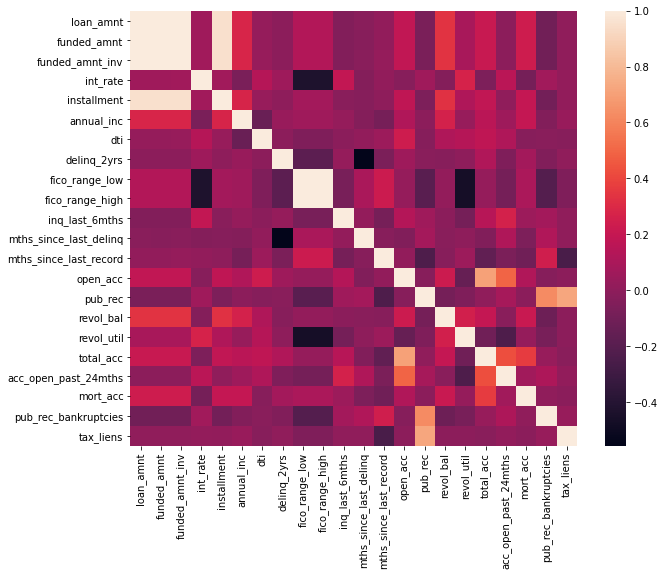

In [8]:
corr = data.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr)
plt.show()

In [9]:
corr_int_rate = corr[['int_rate']]
corr_int_rate

,int_rate
loan_amnt,0.06
funded_amnt,0.06
funded_amnt_inv,0.06
int_rate,1.00
installment,0.07
annual_inc,-0.08
dti,0.14
delinq_2yrs,0.05
fico_range_low,-0.43
fico_range_high,-0.43


In [10]:
top_10_pos = corr_int_rate[corr_int_rate['int_rate'] > 0].sort_values(by=['int_rate'],ascending=False)
top_10_pos

,int_rate
int_rate,1.00
revol_util,0.27
inq_last_6mths,0.19
acc_open_past_24mths,0.16
dti,0.14
pub_rec_bankruptcies,0.07
installment,0.07
funded_amnt_inv,0.06
funded_amnt,0.06
loan_amnt,0.06


In [11]:
top_10_neg = corr_int_rate[corr_int_rate['int_rate']< 0].sort_values(by=['int_rate'],ascending=False)
top_10_neg

,int_rate
open_acc,-0.02
mths_since_last_delinq,-0.03
revol_bal,-0.04
total_acc,-0.06
annual_inc,-0.08
mort_acc,-0.09
fico_range_high,-0.43
fico_range_low,-0.43


### Classifier

In [12]:
# Split Data 
from sklearn.model_selection import train_test_split
train, test  = train_test_split(data, test_size=0.30, random_state=42)

train.shape, test.shape

((89833, 35), (38501, 35))

In [13]:
target = 'loan_status'
features = train.columns.drop(['loan_status' 
                               ,'funded_amnt_inv'])

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [14]:
%%time
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
)

pipeline.fit(X_train, y_train);

CPU times: user 26.6 s, sys: 311 ms, total: 26.9 s
Wall time: 4.97 s


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['term', 'grade', 'sub_grade', 'emp_title',
                                      'emp_length', 'home_ownership',
                                      'verification_status', 'issue_d',
                                      'purpose', 'addr_state',
                                      'initial_list_status',
                                      'earliest_cr_line'],
                                mapping=[{'col': 'term',
                                          'data_type': dtype('O'),
                                          'mapping':  60 months    1
 36 months    2
NaN          -2
dtype: int64},
                                         {'col': 'grade',
                                          'data_type': dtype('O')...
Mar-1964    633
May-1957    634
May-1963    635
Jan-1955    636
Jul-1965    637
May-1964    638
Nov-1967    639
Jun-1960    640
Aug-1968    641
May-2015    642
Jul-1963    643
Apr-1967    644


In [15]:
from sklearn.metrics import accuracy_score

y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

0.8238227578504455

In [47]:
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='plasma')

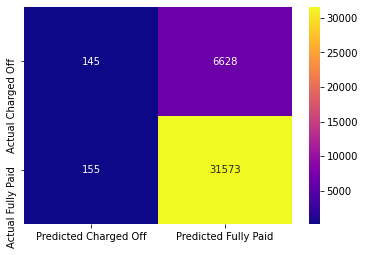

In [48]:
plot_confusion_matrix(y_test, y_pred);

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 Charged Off       0.48      0.02      0.04      6773
  Fully Paid       0.83      1.00      0.90     31728

    accuracy                           0.82     38501
   macro avg       0.65      0.51      0.47     38501
weighted avg       0.77      0.82      0.75     38501



In [50]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred_proba)

0.6765894846152432

In [51]:
from sklearn.utils.multiclass import unique_labels
from ipywidgets import interact, fixed
from sklearn.metrics import roc_auc_score, roc_curve

def threshold_tuning(y_true, y_pred_proba, threshold=0.8):
    # Apply different Thresholds
    class_0, class_1 = unique_labels(y_true)
    y_pred = np.full_like(y_true, fill_value=class_0)
    y_pred[y_pred_proba > threshold] = class_1
    
    # Confusion Matrix and Classification Report
    plot_confusion_matrix(y_true, y_pred)
    plt.show()
    print(classification_report(y_true, y_pred))

    # Calc True Positive and False Positive Rates
    true_positives = (y_pred==y_true) & (y_pred==class_1)
    actual_positives = (y_true==class_1)
    true_positive_rate = true_positives.sum() / actual_positives.sum()
    print('True Positive Rate', true_positive_rate)
    
    false_positives = (y_pred!=y_true) & (y_pred==class_1)
    actual_negatives = (y_true==class_0)
    false_positive_rate = false_positives.sum() / actual_negatives.sum()
    print('False Positive Rate', false_positive_rate)
    
    # ROC CURVE
    fpr, tpr, thresholds = roc_curve(y_true==class_1, y_pred_proba)
    plt.plot(fpr, tpr)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # ROC CURVE for threshold
    plt.scatter(false_positive_rate, true_positive_rate)
    plt.show()
    
    # AUC score
    print('AREA UNDER ROC CURVE:', 
          roc_auc_score(y_true, y_pred_proba))
    
    # Predicted Proba Distribution
    ax = sns.distplot(y_pred_proba)
    ax.axvline(threshold, color='red')
    plt.title('Predicted Probabilities Distributions')
    plt.show()

t_tuner = interact(threshold_tuning, 
         y_true=fixed(y_test), 
         y_pred_proba=fixed(y_pred_proba), 
         threshold=(0,1,0.05))
t_tuner;

interactive(children=(FloatSlider(value=0.8, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…